In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
files = glob.glob('./ImageOfSY/*')
files

['./ImageOfSY\\0001.png',
 './ImageOfSY\\0002.png',
 './ImageOfSY\\0003.png',
 './ImageOfSY\\0004.png',
 './ImageOfSY\\0005.png',
 './ImageOfSY\\lenna.bmp',
 './ImageOfSY\\pepper.bmp']

## 查看所有图像

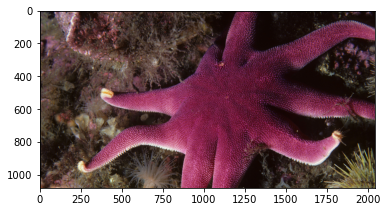

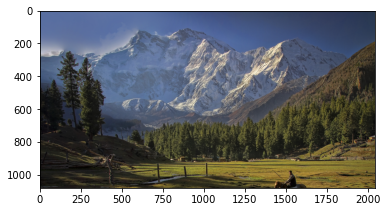

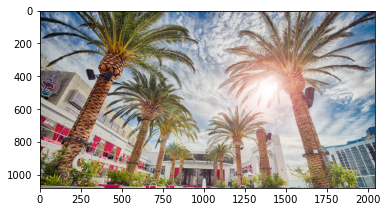

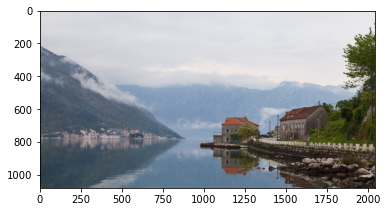

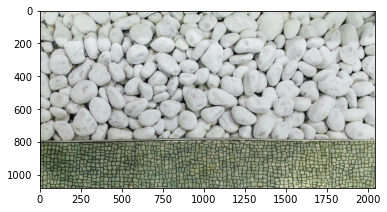

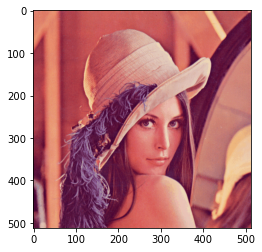

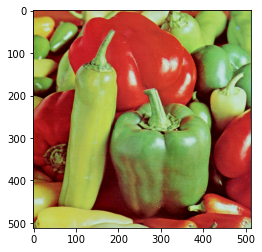

In [3]:
for file in files:
    img = cv2.imread(file)
    plt.subplots()
    plt.imshow(img[...,::-1])

## 1. 输出RGB

- 由于opencv读出的图像是bgr顺序，因此在plt时需要对其矩阵进行倒序

(1080, 2040, 3)


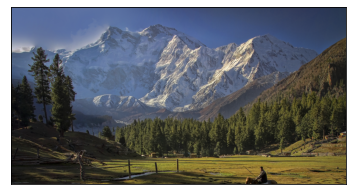

In [79]:
img = cv2.imread(files[1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [43]:
# r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
r, g, b = cv2.split(img)
r, g, b

(array([[ 90,  90,  90, ...,  38,  39,  38],
        [ 90,  90,  90, ...,  39,  39,  39],
        [ 90,  90,  90, ...,  39,  38,  40],
        ...,
        [ 29,  29,  28, ..., 124, 145, 128],
        [ 26,  27,  31, ..., 152, 165, 143],
        [ 25,  25,  25, ..., 109,  87, 112]], dtype=uint8),
 array([[110, 110, 110, ...,  54,  55,  54],
        [110, 110, 110, ...,  54,  54,  54],
        [110, 110, 110, ...,  54,  53,  55],
        ...,
        [ 29,  29,  28, ..., 111, 129, 113],
        [ 26,  26,  30, ..., 137, 146, 125],
        [ 25,  26,  26, ...,  93,  74,  99]], dtype=uint8),
 array([[160, 160, 160, ...,  75,  76,  75],
        [160, 160, 160, ...,  75,  75,  75],
        [160, 160, 160, ...,  75,  74,  76],
        ...,
        [ 28,  27,  26, ...,  38,  52,  38],
        [ 24,  25,  29, ...,  61,  72,  51],
        [ 23,  23,  22, ...,  38,  23,  36]], dtype=uint8))

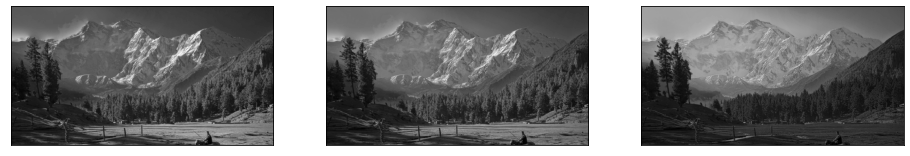

In [78]:
# plt.subplots()
plt.figure(figsize=(16,12))

plt.subplot(131)
plt.xticks([])
plt.yticks([])
plt.imshow(r, cmap='gray')

plt.subplot(132)
plt.xticks([])
plt.yticks([])
plt.imshow(g, cmap='gray')

plt.subplot(133)
plt.xticks([])
plt.yticks([])
plt.imshow(b, cmap='gray')

In [45]:
height, width = b.shape
b[:4,:4]

array([[160, 160, 160, 160],
       [160, 160, 160, 160],
       [160, 160, 160, 161],
       [160, 160, 160, 161]], dtype=uint8)

### 1.2 编写抽样函数 4:2:0 (均值抽样)

In [80]:
# sample_g
def sample_420(img):
    height, width = img.shape
    sample = np.zeros((height, width), dtype=np.uint8)
    for i in range(1, height, 2):
        for j in range(1, width, 2):
            num = int(img[i-1, j-1] / 4 + img[i-1, j] / 4 + img[i, j-1] / 4 + img[i, j] / 4)
            sample[i-1,j-1], sample[i-1,j], sample[i,j-1], sample[i,j] = num, num, num, num
    return sample

In [75]:
sample_g = sample_420(g)
sample_g = sample_g.astype(np.uint8)

sample_b = sample_420(b)
sample_b = sample_b.astype(np.uint8)

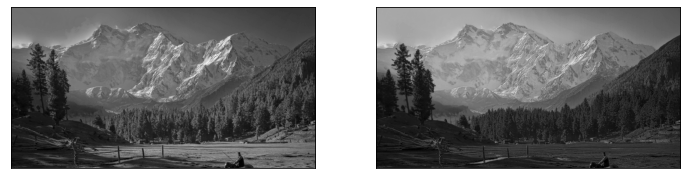

In [76]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(sample_g, cmap='gray')
# cv2.imshow('sample_g', sample_g)
# cv2.waitKey(0)

plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(sample_b, cmap='gray')
# cv2.imshow('sample_b', sample_b)
# cv2.waitKey(0)

In [51]:
sample_b, b, sample_g, g,r

(array([[160, 160, 160, ...,  75,  75,  75],
        [160, 160, 160, ...,  75,  75,  75],
        [160, 160, 160, ...,  75,  75,  75],
        ...,
        [ 26,  26,  24, ...,  45,  54,  54],
        [ 23,  23,  26, ...,  49,  45,  45],
        [ 23,  23,  26, ...,  49,  45,  45]], dtype=uint8),
 array([[160, 160, 160, ...,  75,  76,  75],
        [160, 160, 160, ...,  75,  75,  75],
        [160, 160, 160, ...,  75,  74,  76],
        ...,
        [ 28,  27,  26, ...,  38,  52,  38],
        [ 24,  25,  29, ...,  61,  72,  51],
        [ 23,  23,  22, ...,  38,  23,  36]], dtype=uint8),
 array([[110, 110, 110, ...,  54,  54,  54],
        [110, 110, 110, ...,  54,  54,  54],
        [110, 110, 110, ...,  54,  54,  54],
        ...,
        [ 27,  27,  26, ..., 116, 128, 128],
        [ 25,  25,  28, ..., 116, 111, 111],
        [ 25,  25,  28, ..., 116, 111, 111]], dtype=uint8),
 array([[110, 110, 110, ...,  54,  55,  54],
        [110, 110, 110, ...,  54,  54,  54],
        [110, 11

###  1.3 输出合并后的图像

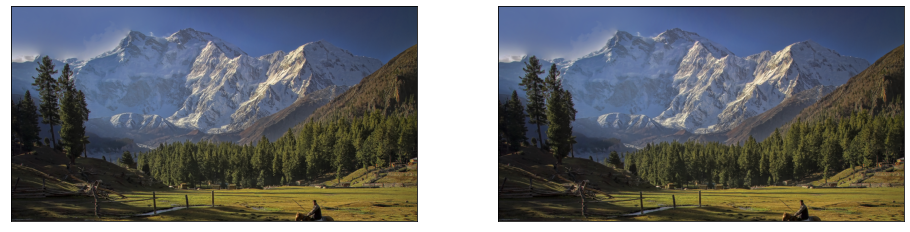

In [99]:
new_img = cv2.merge([r, sample_g, sample_b])

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(img[...,::-1])

plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(new_img)

### 1.4 信噪比PSNR


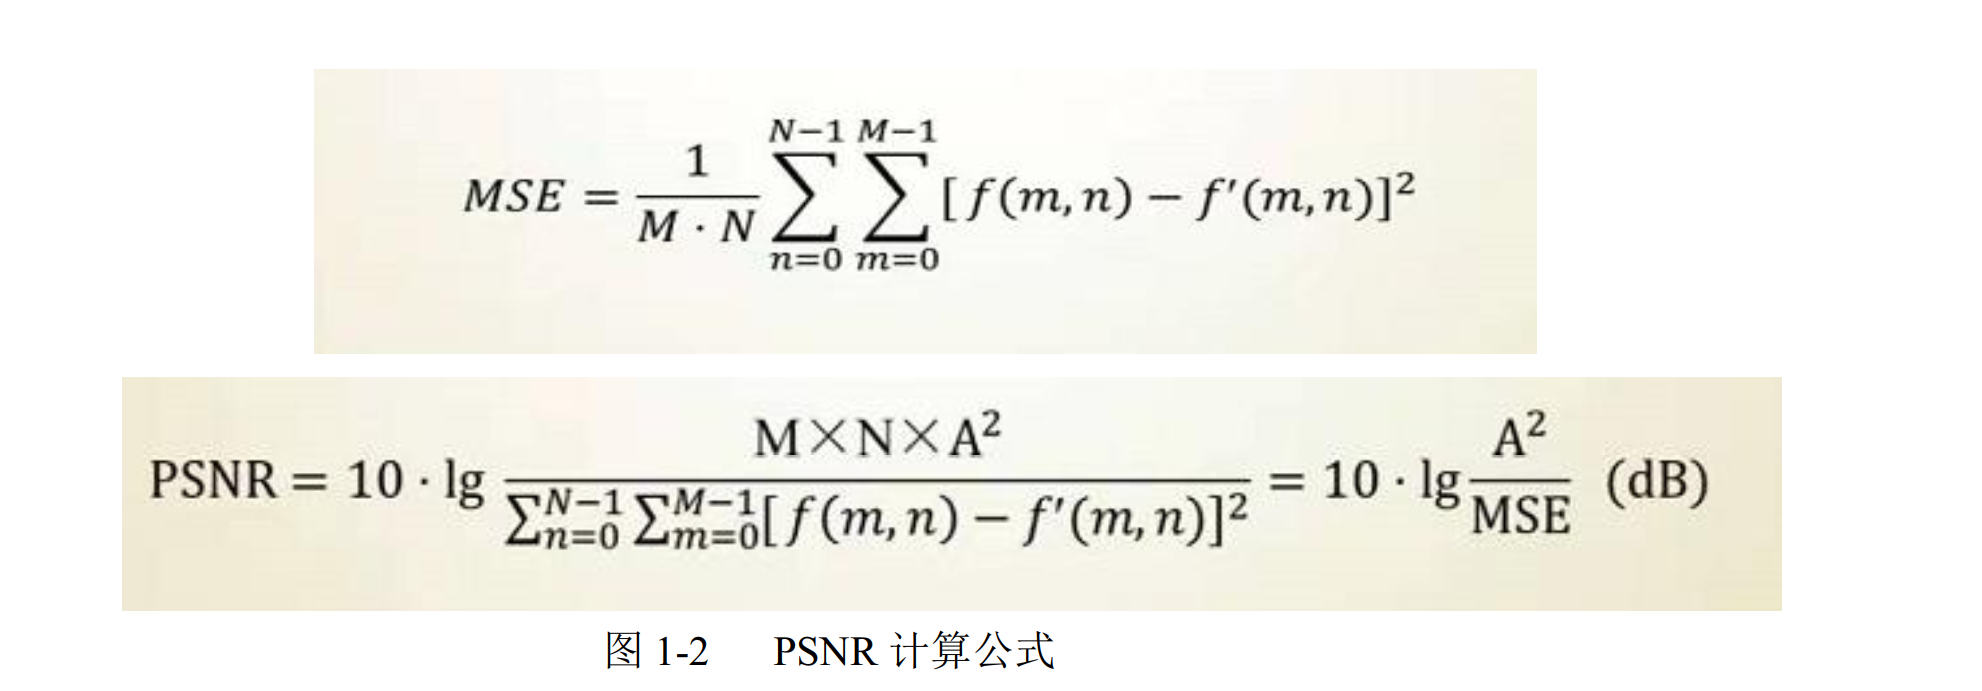

In [40]:
def compute_psnr(img_in, img_sam):
    assert img_in.shape == img_sam.shape, "The sample image's shape is not same as the input!"
    
    mse = np.mean( (img_in/255. - img_sam/255.) ** 2 )
    if mse < 1.0e-10:
        return 100
    return 20 * np.log10(1 / np.sqrt(mse))

In [103]:
bgr_psnr = compute_psnr(img, new_img)
# bgr_psnr
print(f'PSNR = {bgr_psnr:.4f}')

PSNR = 16.4407


## 2. RGB -> YCbCr

In [84]:
img = cv2.imread(files[1])
yCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
yCrCb.shape

(1080, 2040, 3)

In [85]:
y, cr, cb = cv2.split(yCrCb)
# y.shape
y, cr, cb

(array([[110, 110, 110, ...,  52,  53,  52],
        [110, 110, 110, ...,  52,  52,  52],
        [110, 110, 110, ...,  52,  51,  53],
        ...,
        [ 29,  29,  28, ..., 107, 125, 109],
        [ 26,  26,  30, ..., 133, 143, 122],
        [ 25,  25,  25, ...,  92,  72,  96]], dtype=uint8),
 array([[114, 114, 114, ..., 118, 118, 118],
        [114, 114, 114, ..., 119, 119, 119],
        [114, 114, 114, ..., 119, 119, 119],
        ...,
        [128, 128, 128, ..., 140, 142, 142],
        [128, 129, 129, ..., 142, 144, 143],
        [128, 128, 128, ..., 140, 139, 139]], dtype=uint8),
 array([[156, 156, 156, ..., 141, 141, 141],
        [156, 156, 156, ..., 141, 141, 141],
        [156, 156, 156, ..., 141, 141, 141],
        ...,
        [127, 127, 127, ...,  89,  87,  88],
        [127, 127, 127, ...,  87,  88,  88],
        [127, 127, 126, ...,  98, 100,  94]], dtype=uint8))

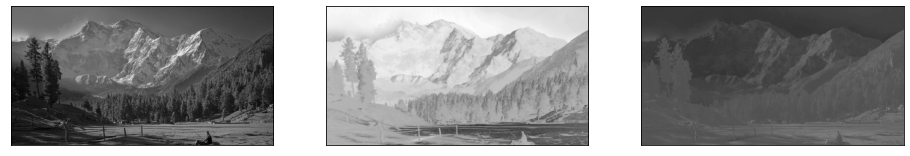

In [95]:
# 该输出方法仍有些差异
plt.figure(figsize=(16,12))
plt.subplot(131)
plt.xticks([])
plt.yticks([])
plt.imshow(y, cmap='gray')

plt.subplot(132)
plt.xticks([])
plt.yticks([])
plt.imshow(cb, cmap='gray')

plt.subplot(133)
plt.xticks([])
plt.yticks([])
plt.imshow(cr, cmap='gray')

In [87]:
# plt.figure(figsize=(16,12))
cv2.imshow('Y', y)
cv2.waitKey(0)

cv2.imshow('Cb', cb)
cv2.waitKey(0)

cv2.imshow('Cr', cr)
cv2.waitKey(0)

-1

In [88]:
# plt.figure(figsize=(12,8))

sample_cb = sample_420(cb)
sample_cb = sample_cb.astype(np.uint8)
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(sample_cb, cmap='gray')
cv2.imshow('sample_cb', sample_cb)
cv2.waitKey(0)

sample_cr = sample_420(cr)
sample_cr = sample_cr.astype(np.uint8)
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(sample_cr, cmap='gray')
cv2.imshow('sample_cr', sample_cr)
cv2.waitKey(0)

-1

In [89]:
y, sample_cb, sample_cr

(array([[110, 110, 110, ...,  52,  53,  52],
        [110, 110, 110, ...,  52,  52,  52],
        [110, 110, 110, ...,  52,  51,  53],
        ...,
        [ 29,  29,  28, ..., 107, 125, 109],
        [ 26,  26,  30, ..., 133, 143, 122],
        [ 25,  25,  25, ...,  92,  72,  96]], dtype=uint8),
 array([[156, 156, 156, ..., 141, 141, 141],
        [156, 156, 156, ..., 141, 141, 141],
        [156, 156, 156, ..., 141, 141, 141],
        ...,
        [127, 127, 127, ...,  90,  88,  88],
        [127, 127, 126, ...,  91,  92,  92],
        [127, 127, 126, ...,  91,  92,  92]], dtype=uint8),
 array([[114, 114, 114, ..., 118, 118, 118],
        [114, 114, 114, ..., 118, 118, 118],
        [114, 114, 114, ..., 119, 119, 119],
        ...,
        [127, 127, 128, ..., 142, 142, 142],
        [128, 128, 128, ..., 140, 141, 141],
        [128, 128, 128, ..., 140, 141, 141]], dtype=uint8))

-1

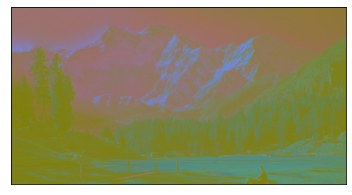

In [96]:
new_img_ycbcr = cv2.merge([y,sample_cr, sample_cb])
plt.xticks([])
plt.yticks([])
plt.imshow(new_img_ycbcr[...,::-1])
cv2.imshow('new_img_ycbcr', new_img_ycbcr)
cv2.waitKey(0)

In [102]:
bgr_psnr = compute_psnr(yCrCb, new_img_ycbcr)
print(f'PSNR = {bgr_psnr:.4f}')

PSNR = 44.8177


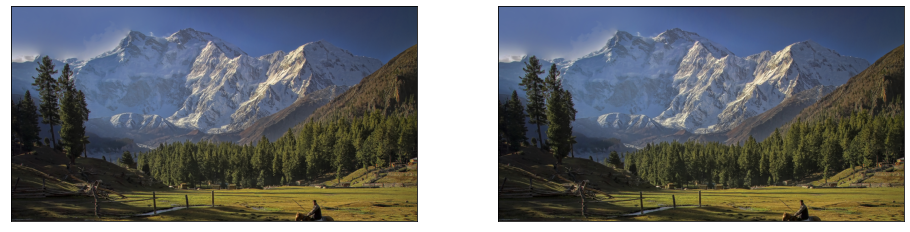

In [94]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(img[...,::-1])

ycbcr2rgb = cv2.cvtColor(new_img_ycbcr, cv2.COLOR_YCrCb2RGB)
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(ycbcr2rgb)

In [101]:
bgr_psnr = compute_psnr(img, ycbcr2rgb)
print(f'PSNR = {bgr_psnr:.4f}')

PSNR = 16.8021
